<a href="https://colab.research.google.com/github/InsightByHarshit/Amazon-Stock-Analysis/blob/main/Amazon_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Part1_data.csv')

In [ ]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
data['Date']

,Date
0,01-10-2010
1,04-10-2010
2,05-10-2010
3,06-10-2010
4,07-10-2010
...,...
2512,24-09-2020
2513,25-09-2020
2514,28-09-2020
2515,29-09-2020


Summary Statistics:
               Open         High          Low        Close    Adj Close  \
count  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000   
mean    854.694502   863.694672   844.614346   854.636107   854.636107   
std     745.456591   754.210120   735.446543   745.201139   745.201139   
min     152.509995   155.960007   151.399994   153.029999   153.029999   
25%     266.809998   269.480011   263.850006   266.489990   266.489990   
50%     534.479980   539.390015   526.599976   533.750000   533.750000   
75%    1495.339966  1525.380005  1478.500000  1500.000000  1500.000000   
max    3547.000000  3552.250000  3486.689941  3531.449951  3531.449951   

             Volume  
count  2.517000e+03  
mean   4.326001e+06  
std    2.410250e+06  
min    8.813000e+05  
25%    2.769400e+06  
50%    3.710900e+06  
75%    5.111000e+06  
max    2.413420e+07  
Missing Values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: 

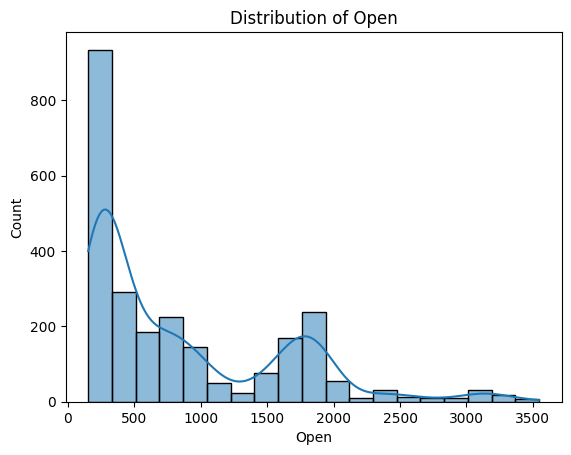

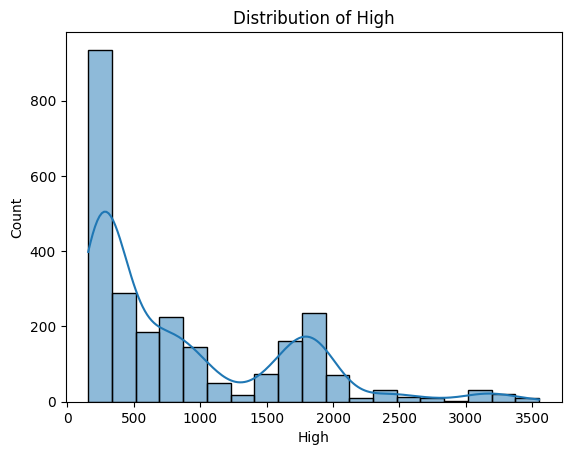

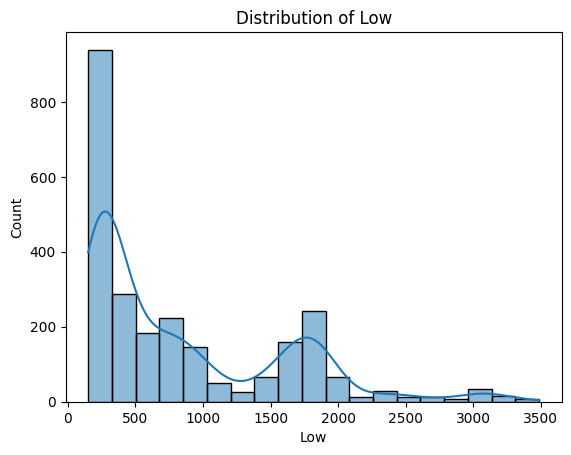

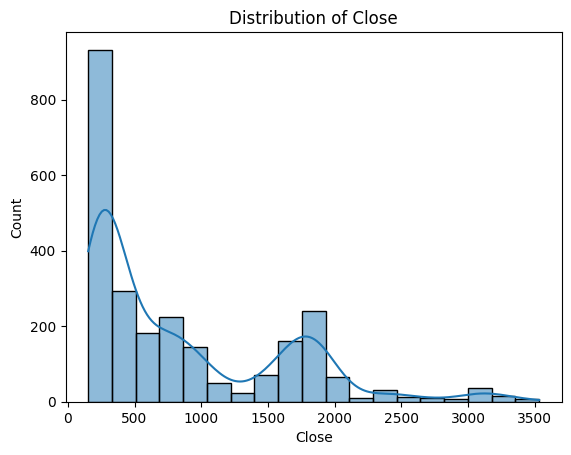

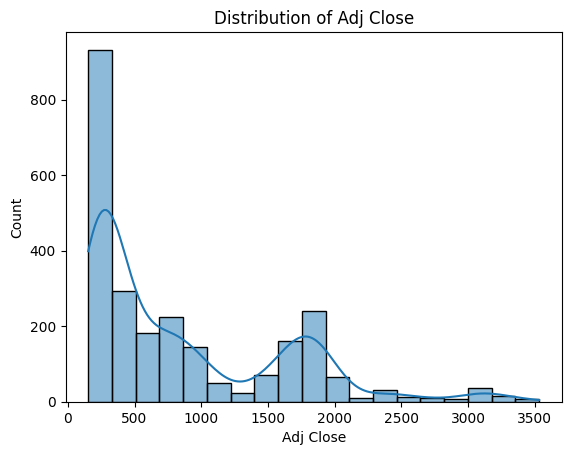

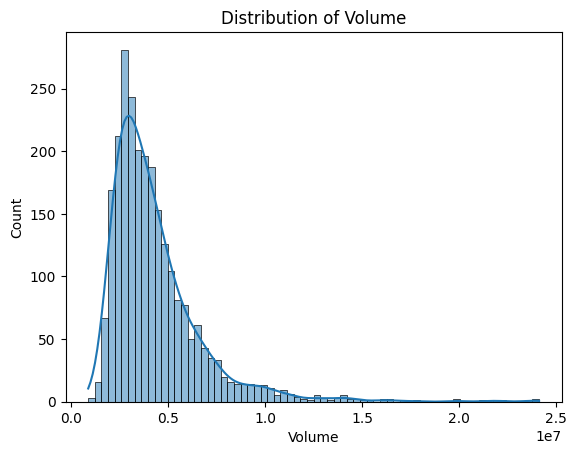

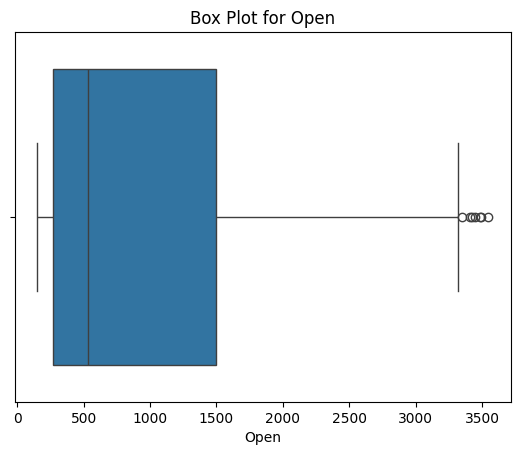

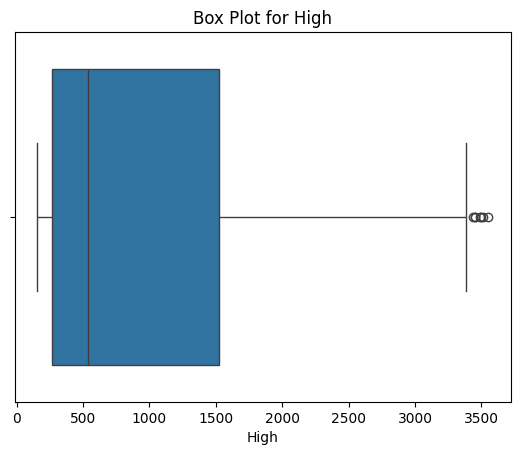

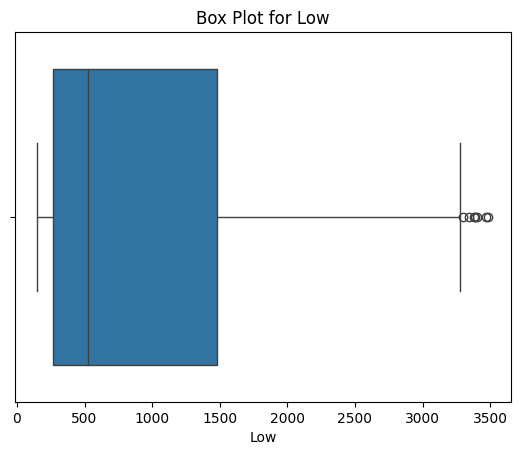

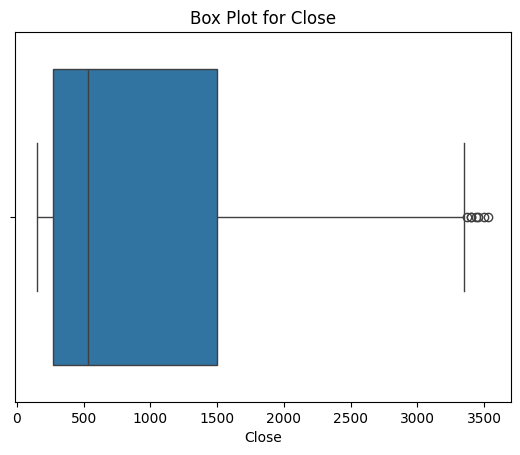

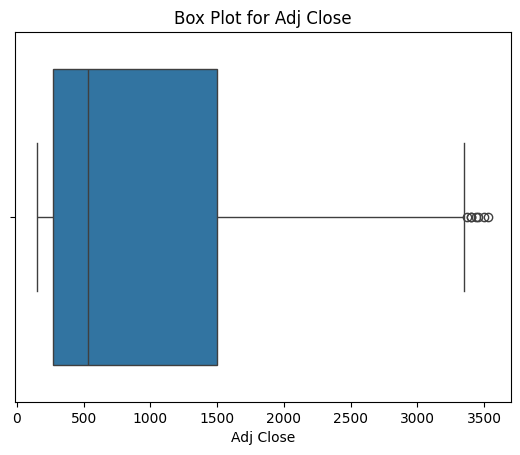

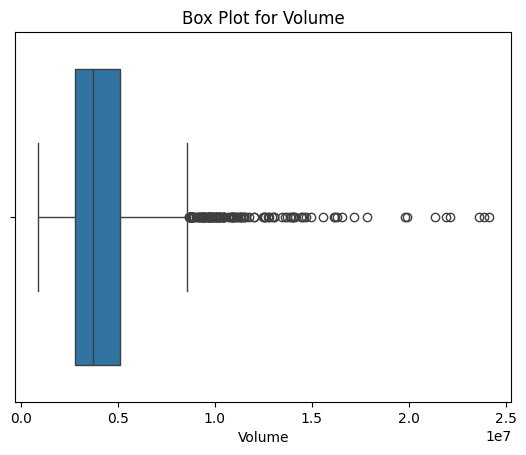

Variances:
 Open         5.557055e+05
High         5.688329e+05
Low          5.408816e+05
Close        5.553247e+05
Adj Close    5.553247e+05
Volume       5.809307e+12
dtype: float64
Ranges:
 Open         3.394490e+03
High         3.396290e+03
Low          3.335290e+03
Close        3.378420e+03
Adj Close    3.378420e+03
Volume       2.325290e+07
dtype: float64
Skewness of Open: 1.1773269043873626
Kurtosis of Open: 0.6581818336691034
Skewness of High: 1.185957485196851
Kurtosis of High: 0.6897249155793648
Skewness of Low: 1.1657668879539587
Kurtosis of Low: 0.6075408586650788
Skewness of Close: 1.1754163047937882
Kurtosis of Close: 0.6459162668997585
Skewness of Adj Close: 1.1754163047937882
Kurtosis of Adj Close: 0.6459162668997585
Skewness of Volume: 2.716071343666045
Kurtosis of Volume: 12.516658752215886


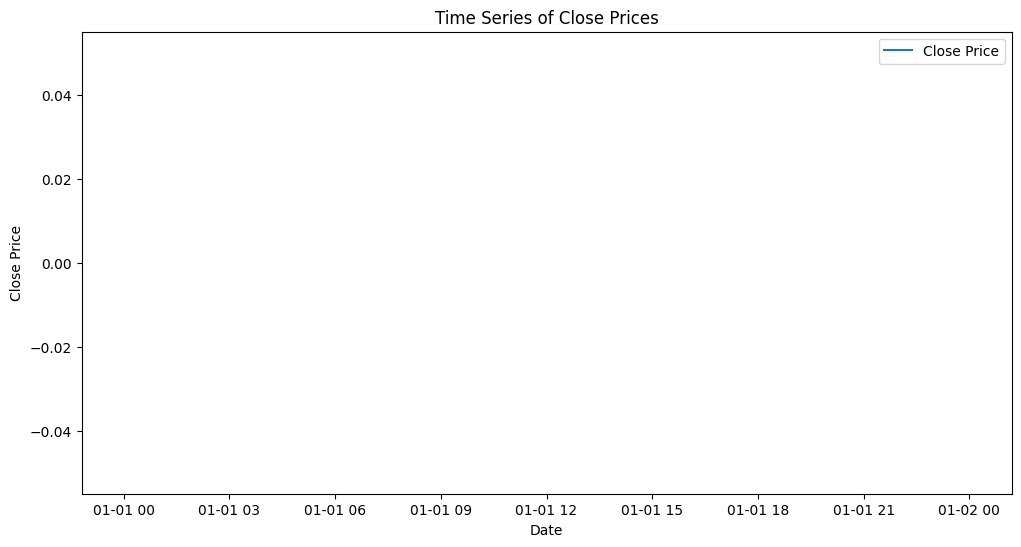

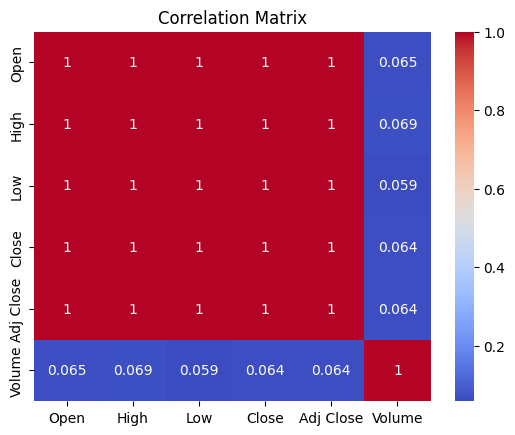

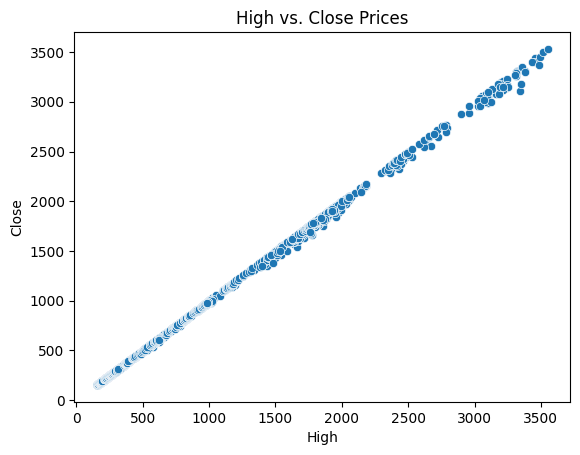

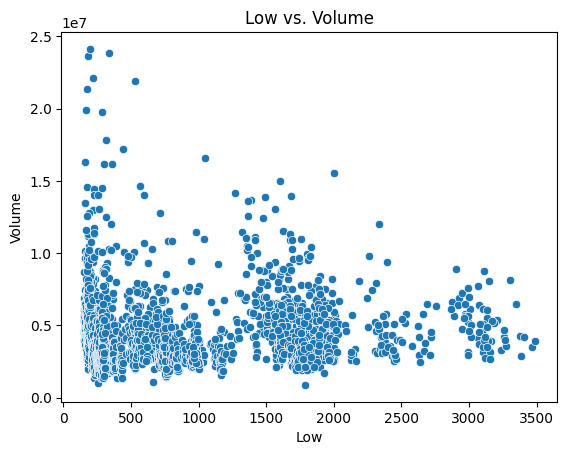

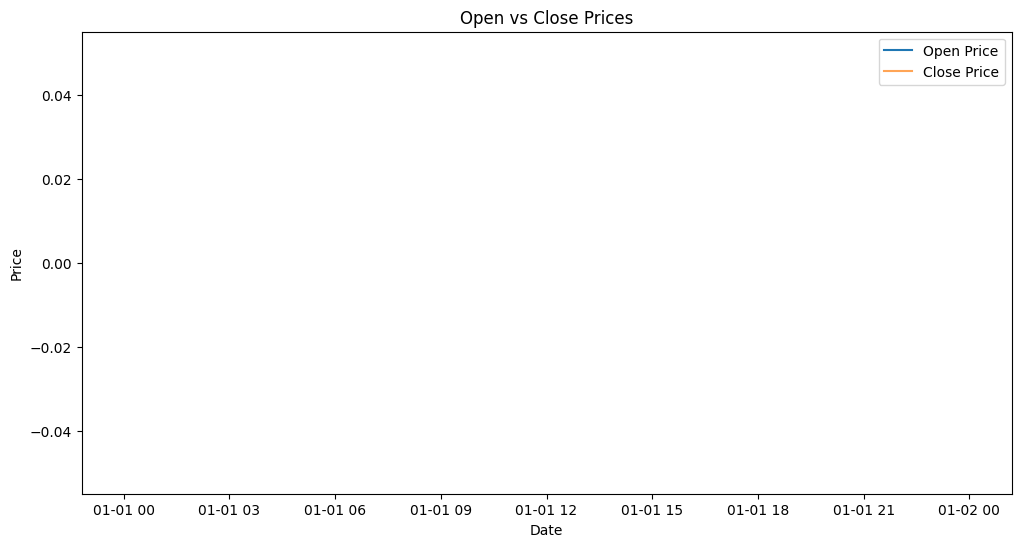

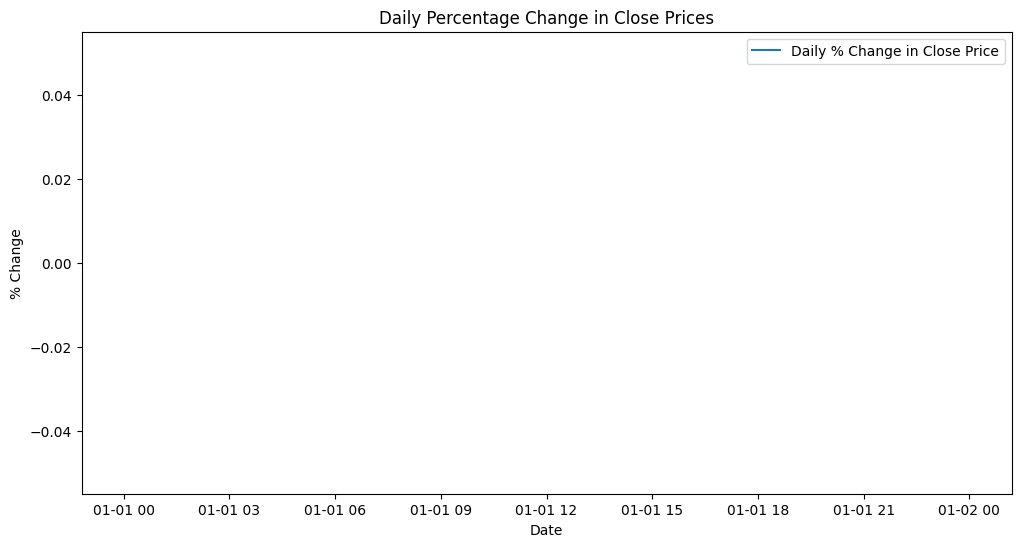

IndexError: index 0 is out of bounds for axis 0 with size 0

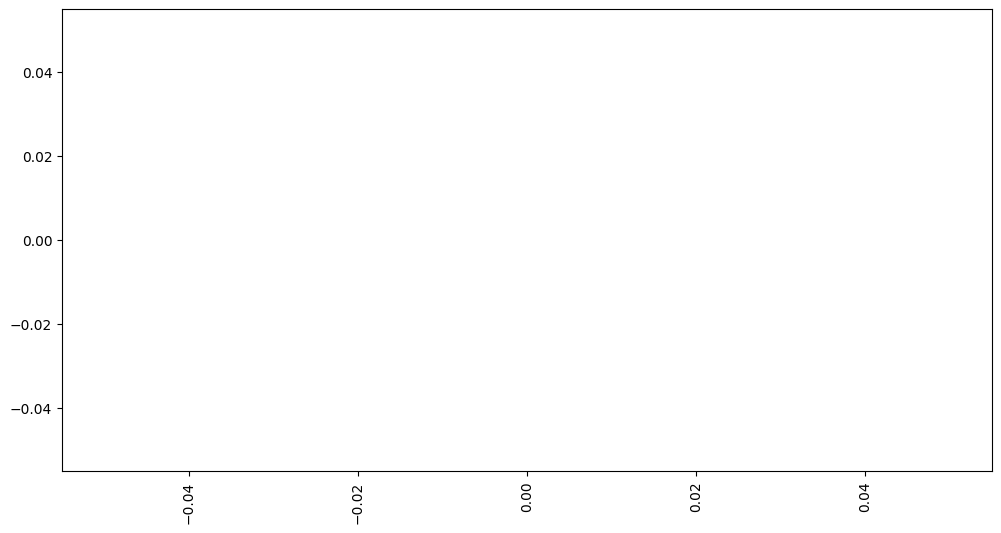

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d", errors='coerce') # Changed the format to %Y-%m-%d based on user input and set errors='coerce'
data.sort_values('Date', inplace=True)
data.set_index('Date', inplace=True)

# ================== Univariate Analysis ==================
# 1. Summary statistics
summary_stats = data.describe()
print("Summary Statistics:\n", summary_stats)

# 2. Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# 3. Distribution of numerical columns
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in numerical_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# 4. Identify outliers using box plots
for col in numerical_cols:
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

# 5. Variance and range of numerical columns
variances = data[numerical_cols].var()
print("Variances:\n", variances)
ranges = data[numerical_cols].max() - data[numerical_cols].min()
print("Ranges:\n", ranges)

# 6. Skewness and kurtosis
for col in numerical_cols:
    print(f"Skewness of {col}: {data[col].skew()}")
    print(f"Kurtosis of {col}: {data[col].kurt()}")

# 7. Time-series line plot for Close prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Time Series of Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# ================== Bivariate Analysis ==================
# 8. Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

# 9. Scatter plots for relationships
sns.scatterplot(x=data['High'], y=data['Close'])
plt.title('High vs. Close Prices')
plt.show()
sns.scatterplot(x=data['Low'], y=data['Volume'])
plt.title('Low vs. Volume')
plt.show()

# 10. Compare Open and Close prices daily
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Open'], label='Open Price')
plt.plot(data.index, data['Close'], label='Close Price', alpha=0.7)
plt.title('Open vs Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 11. Percentage change in Close prices
data['Close_pct_change'] = data['Close'].pct_change() * 100
plt.figure(figsize=(12, 6))
plt.plot(data['Close_pct_change'], label='Daily % Change in Close Price')
plt.title('Daily Percentage Change in Close Prices')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.show()

# 12. Group by year and average Close price
data['Year'] = data.index.year
avg_close_by_year = data.groupby('Year')['Close'].mean()
avg_close_by_year.plot(kind='bar', figsize=(12, 6))
plt.title('Average Close Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.show()

# 13. Dual-axis plot of Volume and Adj Close
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.plot(data.index, data['Volume'], 'g-', label='Volume')
ax2.plot(data.index, data['Adj Close'], 'b-', label='Adj Close')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='g')
ax2.set_ylabel('Adj Close', color='b')
plt.title('Volume vs Adj Close Prices')
plt.show()

# 14. Day with the highest trading volume
max_volume_day = data['Volume'].idxmax()
print("Day with highest Volume:", max_volume_day)
print(data.loc[max_volume_day])

# ================== Multivariate Analysis ==================
# 15. Rolling averages on Close prices
data['7_day_avg'] = data['Close'].rolling(window=7).mean()
data['30_day_avg'] = data['Close'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['7_day_avg'], label='7-Day Avg', alpha=0.7)
plt.plot(data['30_day_avg'], label='30-Day Avg', alpha=0.7)
plt.title('Close Price with Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 16. Monthly trend of Adj Close
data['Month'] = data.index.month
monthly_avg_adj_close = data.groupby(['Year', 'Month'])['Adj Close'].mean().unstack(level=0)
monthly_avg_adj_close.plot(figsize=(12, 6))
plt.title('Monthly Average Adj Close Prices')
plt.xlabel('Month')
plt.ylabel('Avg Adj Close Price')
plt.legend(title='Year')
plt.show()

# 17. Basic seasonal decomposition substitute (manual trend computation)
data['Trend'] = data['Close'].rolling(window=365, min_periods=1, center=True).mean()
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Trend'], label='Trend (365-day Avg)', color='orange')
plt.title('Seasonal Trend Approximation for Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# 18. Percentage contribution of Volume by year
yearly_volume = data.groupby('Year')['Volume'].sum()
total_volume = yearly_volume.sum()
percentage_contribution = (yearly_volume / total_volume) * 100
percentage_contribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Percentage Contribution of Volume by Year')
plt.ylabel('')
plt.show()


In [ ]:
# ================== Univariate Analysis ==================
# 1. Summary statistics
summary_stats = data.describe()
print("Summary Statistics:\n", summary_stats)

# 2. Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# 3. Distribution of numerical columns
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in numerical_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# 4. Identify outliers using box plots
for col in numerical_cols:
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

# 5. Variance and range of numerical columns
variances = data[numerical_cols].var()
print("Variances:\n", variances)
ranges = data[numerical_cols].max() - data[numerical_cols].min()
print("Ranges:\n", ranges)

# 6. Skewness and kurtosis
for col in numerical_cols:
    print(f"Skewness of {col}: {data[col].skew()}")
    print(f"Kurtosis of {col}: {data[col].kurt()}")

# 7. Time-series line plot for Close prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Time Series of Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# ================== Bivariate Analysis ==================
# 8. Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

# 9. Scatter plots for relationships
sns.scatterplot(x=data['High'], y=data['Close'])
plt.title('High vs. Close Prices')
plt.show()
sns.scatterplot(x=data['Low'], y=data['Volume'])
plt.title('Low vs. Volume')
plt.show()

# 10. Compare Open and Close prices daily
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Open'], label='Open Price')
plt.plot(data.index, data['Close'], label='Close Price', alpha=0.7)
plt.title('Open vs Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 11. Percentage change in Close prices
data['Close_pct_change'] = data['Close'].pct_change() * 100
plt.figure(figsize=(12, 6))
plt.plot(data['Close_pct_change'], label='Daily % Change in Close Price')
plt.title('Daily Percentage Change in Close Prices')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.show()

# 12. Group by year and average Close price
data['Year'] = data.index.year
avg_close_by_year = data.groupby('Year')['Close'].mean()
avg_close_by_year.plot(kind='bar', figsize=(12, 6))
plt.title('Average Close Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.show()

# 13. Dual-axis plot of Volume and Adj Close
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.plot(data.index, data['Volume'], 'g-', label='Volume')
ax2.plot(data.index, data['Adj Close'], 'b-', label='Adj Close')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='g')
ax2.set_ylabel('Adj Close', color='b')
plt.title('Volume vs Adj Close Prices')
plt.show()

# 14. Day with the highest trading volume
max_volume_day = data['Volume'].idxmax()
print("Day with highest Volume:", max_volume_day)
print(data.loc[max_volume_day])

# ================== Multivariate Analysis ==================
# 15. Rolling averages on Close prices
data['7_day_avg'] = data['Close'].rolling(window=7).mean()
data['30_day_avg'] = data['Close'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['7_day_avg'], label='7-Day Avg', alpha=0.7)
plt.plot(data['30_day_avg'], label='30-Day Avg', alpha=0.7)
plt.title('Close Price with Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 16. Monthly trend of Adj Close
data['Month'] = data.index.month
monthly_avg_adj_close = data.groupby(['Year', 'Month'])['Adj Close'].mean().unstack(level=0)
monthly_avg_adj_close.plot(figsize=(12, 6))
plt.title('Monthly Average Adj Close Prices')
plt.xlabel('Month')
plt.ylabel('Avg Adj Close Price')
plt.legend(title='Year')
plt.show()

# 17. Basic seasonal decomposition substitute (manual trend computation)
data['Trend'] = data['Close'].rolling(window=365, min_periods=1, center=True).mean()
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Trend'], label='Trend (365-day Avg)', color='orange')
plt.title('Seasonal Trend Approximation for Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# 18. Percentage contribution of Volume by year
yearly_volume = data.groupby('Year')['Volume'].sum()
total_volume = yearly_volume.sum()
percentage_contribution = (yearly_volume / total_volume) * 100
percentage_contribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Percentage Contribution of Volume by Year')
plt.ylabel('')
plt.show()